In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
#from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
#import pydotplus

In [2]:
import matplotlib
matplotlib.__version__

'2.0.2'

In [3]:
sns.__version__

'0.8.0'

In [4]:
sns.set_style("whitegrid")

In [5]:
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url..
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170422, 170429, 170506, 170513]
# Test against Julia's nums
#week_nums = [160903, 160910, 160917]
df = get_data(week_nums)

In [6]:
df.columns.tolist()

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [7]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,00:00:00,REGULAR,6136580,2078941
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173


In [8]:
df.shape

(789772, 11)

In [9]:
df.columns = [column.strip() for column in df.columns]

In [10]:
# df.DATE.value_counts().sort_index()

In [11]:
df['KEY'] = df['C/A'] + ',' + df['UNIT'] + ',' + df['SCP'] + ',' + df['STATION']
df['STATIONLINE'] = df['STATION'] + '_' + df['LINENAME']

In [12]:
df.dtypes

C/A            object
UNIT           object
SCP            object
STATION        object
LINENAME       object
DIVISION       object
DATE           object
TIME           object
DESC           object
ENTRIES         int64
EXITS           int64
KEY            object
STATIONLINE    object
dtype: object

In [14]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format="%m/%d/%Y %H:%M:%S")

In [15]:
df['TIME'] = df.DATETIME.dt.time

In [16]:
df.DATETIME.head()

0   2017-04-15 00:00:00
1   2017-04-15 04:00:00
2   2017-04-15 08:00:00
3   2017-04-15 12:00:00
4   2017-04-15 16:00:00
Name: DATETIME, dtype: datetime64[ns]

In [17]:
df.TIME.head()

0    00:00:00
1    04:00:00
2    08:00:00
3    12:00:00
4    16:00:00
Name: TIME, dtype: object

In [103]:
df.DATETIME.tail(10)

196851   2017-05-11 09:00:00
196852   2017-05-11 13:00:00
196853   2017-05-11 17:00:00
196854   2017-05-11 21:00:00
196855   2017-05-12 01:00:00
196856   2017-05-12 05:00:00
196857   2017-05-12 09:00:00
196858   2017-05-12 13:00:00
196859   2017-05-12 17:00:00
196860   2017-05-12 21:00:00
Name: DATETIME, dtype: datetime64[ns]

In [104]:
df.TIME.tail(10)

196851    09:00:00
196852    13:00:00
196853    17:00:00
196854    21:00:00
196855    01:00:00
196856    05:00:00
196857    09:00:00
196858    13:00:00
196859    17:00:00
196860    21:00:00
Name: TIME, dtype: object

In [18]:
(df
 .groupby(["KEY", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,KEY,DATETIME,ENTRIES
109331,"G001,R151,00-00-00,CONEY IS-STILLW",2017-05-09 05:00:00,2
323055,"N329,R201,00-00-00,WOODHAVEN BLVD",2017-04-28 05:00:00,2
0,"A002,R051,02-00-00,59 ST",2017-04-15 00:00:00,1
526517,"R145,R032,00-00-02,TIMES SQ-42 ST",2017-04-20 08:00:00,1
526508,"R145,R032,00-00-02,TIMES SQ-42 ST",2017-04-18 20:00:00,1


In [19]:
# Explore the duplicate entries on 5/9
# mask = ((df["C/A"] == "G001") & 
# (df["UNIT"] == "R151") & 
# (df["SCP"] == "00-00-00") & 
# (df["STATION"] == "CONEY IS-STILLW") &
# # get datetime properties ~ .dt
# (df["DATETIME"].dt.date == datetime.datetime(2017, 5, 9).date()))
# df[mask].head()

In [20]:
# Explore the duplicate entries on 4/28
# mask = ((df["C/A"] == "N329") & 
# (df["UNIT"] == "R201") & 
# (df["SCP"] == "00-00-00") & 
# (df["STATION"] == "WOODHAVEN BLVD") &
# # get datetime properties ~ .dt
# (df["DATETIME"].dt.date == datetime.datetime(2017, 4, 28).date()))
# df[mask].head()

In [21]:
# df.sort_values(["KEY", "DATETIME"], inplace=True,
#               ascending = True)

In [22]:
df.drop_duplicates(subset=["KEY", "DATETIME"], inplace=True)

In [23]:
df.shape # two duplicates were removed

(789770, 14)

In [24]:
df.sort_values(["KEY", "DATETIME"], inplace=True, ascending=True)

In [25]:
# stationMax = df.groupby("STATION").ENTRIES.max()
# stationMax.sort_values(ascending=False)

In [26]:
# df.sort_values(["KEY",'DATETIME'],inplace=True)

In [27]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,STATIONLINE,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,00:00:00,REGULAR,6136580,2078941,"A002,R051,02-00-00,59 ST",59 ST_NQR456W,2017-04-15 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947,"A002,R051,02-00-00,59 ST",59 ST_NQR456W,2017-04-15 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987,"A002,R051,02-00-00,59 ST",59 ST_NQR456W,2017-04-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109,"A002,R051,02-00-00,59 ST",59 ST_NQR456W,2017-04-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173,"A002,R051,02-00-00,59 ST",59 ST_NQR456W,2017-04-15 16:00:00


In [28]:
df['ENTRYCOUNT'] = df.groupby("KEY")['ENTRIES'].diff()

In [29]:
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

df2 = df.copy()

In [30]:
df.sort_values('ENTRYCOUNT', ascending=False).head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,STATIONLINE,DATETIME,ENTRYCOUNT
22446,C021,R212,00-00-02,59 ST,NRW,BMT,04/21/2017,08:00:00,2031090592,"C021,R212,00-00-02,59 ST",59 ST_NRW,2017-04-21 08:00:00,2.020572e+09
195481,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,05/05/2017,09:00:00,1560221483,"R730,R431,00-00-04,EASTCHSTER/DYRE",EASTCHSTER/DYRE_5,2017-05-05 09:00:00,1.557696e+09
135682,R161B,R452,00-00-03,72 ST,123,IRT,04/30/2017,13:00:00,691260128,"R161B,R452,00-00-03,72 ST",72 ST_123,2017-04-30 13:00:00,6.831548e+08
153362,R241A,R048,00-00-00,GRD CNTRL-42 ST,4567S,IRT,05/04/2017,13:00:00,503289886,"R241A,R048,00-00-00,GRD CNTRL-42 ST",GRD CNTRL-42 ST_4567S,2017-05-04 13:00:00,4.884515e+08
103128,N550,R242,01-05-00,18 AV,F,IND,04/24/2017,16:00:00,117440513,"N550,R242,01-05-00,18 AV",18 AV_F,2017-04-24 16:00:00,1.174379e+08
23499,C026,R215,01-06-01,86 ST,R,BMT,04/18/2017,16:00:00,117484688,"C026,R215,01-06-01,86 ST",86 ST_R,2017-04-18 16:00:00,1.170130e+08
150431,R228,R143,00-00-04,28 ST,6,IRT,04/26/2017,17:00:00,100710462,"R228,R143,00-00-04,28 ST",28 ST_6,2017-04-26 17:00:00,1.003657e+08
166407,R311,R053,00-05-00,3 AV-149 ST,25,IRT,04/28/2017,16:00:00,67108864,"R311,R053,00-05-00,3 AV-149 ST",3 AV-149 ST_25,2017-04-28 16:00:00,6.710797e+07
16380,B022,R229,00-05-00,AVENUE M,BQ,BMT,04/30/2017,12:00:00,16796105,"B022,R229,00-05-00,AVENUE M",AVENUE M_BQ,2017-04-30 12:00:00,1.673498e+07
16085,B022,R229,00-00-00,AVENUE M,BQ,BMT,04/30/2017,11:00:00,16796105,"B022,R229,00-00-00,AVENUE M",AVENUE M_BQ,2017-04-30 11:00:00,1.600624e+07


In [31]:
#df["ABSENTRY"] = df.ENTRYCOUNT.abs()

In [32]:
#df.ABSENTRY.isnull

In [33]:
sum(abs(df.ENTRYCOUNT) > 10000)/len(df)

7.5971485369158109e-05

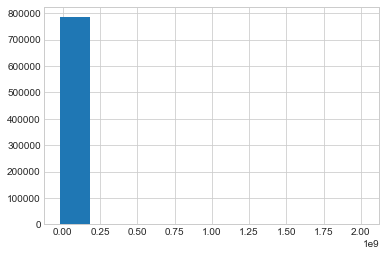

In [34]:
df.ENTRYCOUNT.hist()

In [35]:
# df = df.drop(['EXITS','DESC'],axis=1,errors='ignore')
# df2 = df.copy()

In [36]:
def clean_entries(row, max_counter):
    each = row["ENTRYCOUNT"]
    if each < 0:
        each = -each
    if each > max_counter:
        return 0
    return each

df2['ENTRYCOUNT'] = df2.apply(clean_entries, axis=1, max_counter=10000)

In [37]:
df2StationMax = df2.groupby(['KEY','DATETIME']).ENTRYCOUNT.max()
df2StationMax.sort_values(ascending=False)

KEY                                  DATETIME           
N043,R186,00-00-02,86 ST             2017-04-29 00:00:00    8838.0
PTH18,R549,01-01-02,NEWARK BM BW     2017-05-09 11:18:03    8749.0
N043,R186,00-00-00,86 ST             2017-04-29 00:00:00    8604.0
PTH11,R545,00-00-03,14TH STREET      2017-04-17 10:44:51    8372.0
N043,R186,00-06-01,86 ST             2017-04-29 00:00:00    7846.0
PTH11,R545,00-00-03,14TH STREET      2017-05-10 13:35:05    6514.0
N043,R186,00-00-01,86 ST             2017-04-29 00:00:00    6128.0
N043,R186,00-06-00,86 ST             2017-04-29 00:00:00    4549.0
R238,R046,00-03-02,GRD CNTRL-42 ST   2017-05-10 20:00:00    4481.0
                                     2017-05-09 20:00:00    4051.0
                                     2017-05-12 20:00:00    4007.0
N072,R012,05-03-01,34 ST-PENN STA    2017-04-21 09:42:59    3994.0
N420B,R317,00-00-01,CLINTON-WASH AV  2017-05-06 21:00:00    3962.0
R238,R046,00-00-06,GRD CNTRL-42 ST   2017-04-25 20:00:00    3961.0
R238,

In [38]:
# diffStationMin = df.groupby("STATION").ENTRYCOUNT.min()
# diffStationMin.sort_values(ascending=True)

In [39]:
# stationMax = df.groupby("STATION").ENTRYCOUNT.max()
# stationMax.sort_values(ascending=False)

In [40]:
stationDF = df2.groupby(["STATION"]).ENTRYCOUNT.sum().reset_index()
stationDF.sort_values('ENTRYCOUNT',ascending=False,inplace=True)

In [41]:
stationDF.head(20)

,STATION,ENTRYCOUNT
61,34 ST-PENN STA,4073356.0
232,GRD CNTRL-42 ST,3564273.0
59,34 ST-HERALD SQ,3177042.0
46,23 ST,3066421.0
14,14 ST-UNION SQ,2721362.0
68,42 ST-PORT AUTH,2591526.0
349,TIMES SQ-42 ST,2552338.0
225,FULTON ST,2249652.0
109,86 ST,2210359.0
9,125 ST,2113970.0


In [42]:
#stationDF.to_csv("stations.csv",index_label="Index")

In [43]:
stationLineDF = df2.groupby(["STATIONLINE"]).ENTRYCOUNT.sum().reset_index()
stationLineDF.sort_values('ENTRYCOUNT',ascending=False,inplace=True)

In [44]:
stationLineDF.to_csv("stationsandlines.csv",index_label="Index")

In [45]:
top100 = stationDF[:100]

In [46]:
len(top100) # check

100

In [47]:
top100.head()

,STATION,ENTRYCOUNT
61,34 ST-PENN STA,4073356.0
232,GRD CNTRL-42 ST,3564273.0
59,34 ST-HERALD SQ,3177042.0
46,23 ST,3066421.0
14,14 ST-UNION SQ,2721362.0


In [48]:
len(stationDF)

374

In [49]:
mid = stationDF[int(len(stationDF)/2):int((len(stationDF)/2)+5)]

In [50]:
mid.head()

,STATION,ENTRYCOUNT
283,MOSHOLU PKWY,220432.0
37,191 ST,219385.0
352,TWENTY THIRD ST,218981.0
69,45 ST,214047.0
240,HIGH ST,213612.0


In [51]:
# Replace Days with Name Days
df2['DAY']= df2.DATETIME.dt.dayofweek

In [52]:
df2.DAY.value_counts()

0    113585
3    113363
1    113181
2    113051
5    112397
6    112264
4    111929
Name: DAY, dtype: int64

In [53]:
df2['NAMEDAY']=df2.DAY.replace({0:'1_Monday',1:'2_Tuesday', 2:'3_Wednesday', 3:'4_Thursday',
                       4:'5_Friday', 5:'6_Saturday',6:'7_Sunday'})

In [54]:
df2.ENTRYCOUNT.isnull().sum()

4699

In [55]:
df2['HOUR']= df2.DATETIME.dt.hour

In [56]:
# Drop Null Values
df2.dropna(subset=["ENTRYCOUNT"], axis=0, inplace=True)

In [57]:
df2.shape

(785071, 16)

In [58]:
stationDF = df2.groupby(["STATION",'LINENAME']).ENTRYCOUNT.sum().reset_index()
stationDF.sort_values('ENTRYCOUNT',ascending=False,inplace=True)

In [59]:
stationDF.head()

,STATION,LINENAME,ENTRYCOUNT
312,GRD CNTRL-42 ST,4567S,3564273.0
90,34 ST-HERALD SQ,BDFMNQRW,3177042.0
103,42 ST-PORT AUTH,ACENQRS1237W,2239229.0
94,34 ST-PENN STA,ACE,1926165.0
28,14 ST-UNION SQ,LNQR456W,1894751.0


In [60]:
#top10.ENTRYCOUNT.sum()/df2.ENTRYCOUNT.sum()*100

In [61]:
#top10.ENTRYCOUNT.sum()

In [62]:
df2.STATION.nunique()

374

In [63]:
top10 = stationDF[:10]

In [64]:
top10.head(10)

,STATION,LINENAME,ENTRYCOUNT
312,GRD CNTRL-42 ST,4567S,3564273.0
90,34 ST-HERALD SQ,BDFMNQRW,3177042.0
103,42 ST-PORT AUTH,ACENQRS1237W,2239229.0
94,34 ST-PENN STA,ACE,1926165.0
28,14 ST-UNION SQ,LNQR456W,1894751.0
445,TIMES SQ-42 ST,1237ACENQRSW,1672859.0
289,FLUSHING-MAIN,7,1511605.0
125,59 ST COLUMBUS,ABCD1,1500836.0
302,FULTON ST,2345ACJZ,1435955.0
107,47-50 STS ROCK,BDFM,1394959.0


## Plotting Penn Station

In [65]:
top5 = stationDF[:5]

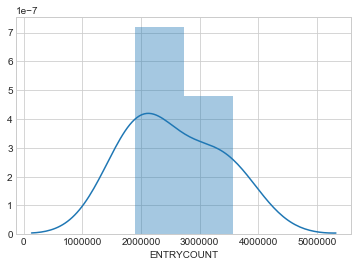

In [66]:
sns.distplot(top5.ENTRYCOUNT)

In [67]:
customFig = (10,8)

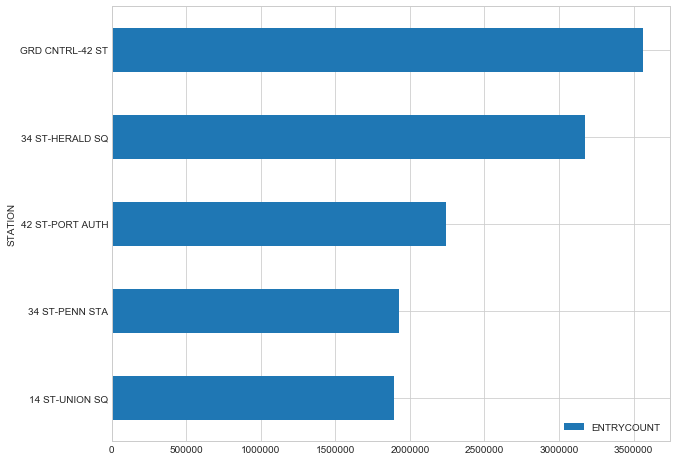

In [68]:
topBar = top5.plot(kind='barh',x='STATION',sort_columns="ENTRYCOUNT", figsize=customFig)
topBar.invert_yaxis()

In [69]:
pennDF = df2.loc[df2.STATION == '34 ST-PENN STA']

In [70]:
pennDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,STATIONLINE,DATETIME,ENTRYCOUNT,DAY,NAMEDAY,HOUR
50417,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,04:00:00,1803492,"N067,R012,00-00-00,34 ST-PENN STA",34 ST-PENN STA_ACE,2017-04-15 04:00:00,1.0,5,6_Saturday,4
50418,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,08:00:00,1803497,"N067,R012,00-00-00,34 ST-PENN STA",34 ST-PENN STA_ACE,2017-04-15 08:00:00,5.0,5,6_Saturday,8
50419,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,12:00:00,1803540,"N067,R012,00-00-00,34 ST-PENN STA",34 ST-PENN STA_ACE,2017-04-15 12:00:00,43.0,5,6_Saturday,12
50420,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,16:00:00,1803584,"N067,R012,00-00-00,34 ST-PENN STA",34 ST-PENN STA_ACE,2017-04-15 16:00:00,44.0,5,6_Saturday,16
50421,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,20:00:00,1803606,"N067,R012,00-00-00,34 ST-PENN STA",34 ST-PENN STA_ACE,2017-04-15 20:00:00,22.0,5,6_Saturday,20


In [71]:
pennDayGroup = pennDF.groupby('NAMEDAY').ENTRYCOUNT.sum()
pennDayGroup

NAMEDAY
1_Monday       660653.0
2_Tuesday      683384.0
3_Wednesday    708493.0
4_Thursday     656074.0
5_Friday       691649.0
6_Saturday     368430.0
7_Sunday       304673.0
Name: ENTRYCOUNT, dtype: float64

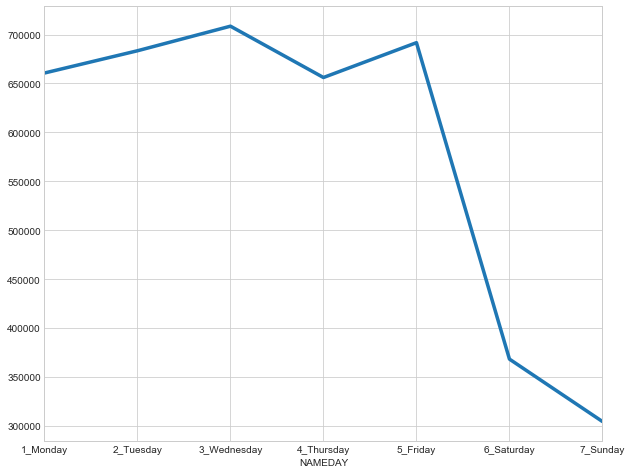

In [72]:
pennDayGroup.plot(kind='line',figsize=customFig, linewidth=3.5)

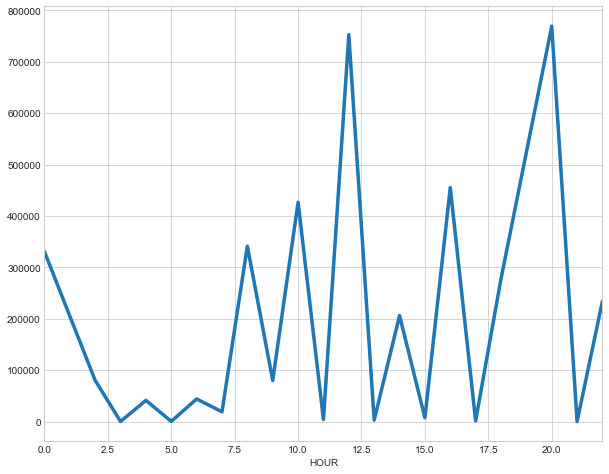

In [73]:
pennHourGroup = pennDF.groupby('HOUR').ENTRYCOUNT.sum()
pennHourGroup.plot(kind='line', figsize=customFig, linewidth = 3.5)

In [74]:
pennHourGroup

HOUR
0     330519.0
2      79979.0
3        128.0
4      41169.0
5        298.0
6      43893.0
7      18962.0
8     341159.0
9      79773.0
10    426635.0
11      4231.0
12    752546.0
13      2716.0
14    206223.0
15      7403.0
16    455094.0
17      1185.0
18    277761.0
20    769254.0
21        19.0
22    234409.0
Name: ENTRYCOUNT, dtype: float64

In [75]:
unionSquareDF = df2.loc[df2.STATION == '14 ST-UNION SQ']

In [76]:
unionSquareDayGroup = unionSquareDF.groupby('NAMEDAY').ENTRYCOUNT.sum()

In [77]:
#twentyDayGroup.plot(kind='line',figsize=customFig, linewidth=3.5)

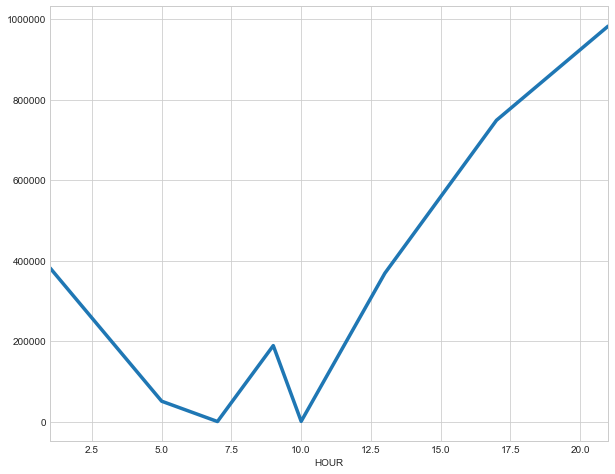

In [78]:
unionSquareHourGroup = unionSquareDF.groupby('HOUR').ENTRYCOUNT.sum()
unionSquareHourGroup.plot(kind='line', figsize=customFig, linewidth=3.5)

In [79]:
#pennDF.DATETIME.value_counts()

In [80]:
# time_group = df2.groupby(pd.TimeGrouper(by='TIME',level='Time', freq='2H'))['ENTRYCOUNT'].agg('sum')   
# time_group.dropna(inplace=True)
# time_group = time_group.to_frame().reset_index()
# print(time_group)

In [81]:
topNYCDF = df2.loc[(df2.STATION == 'GRD CNTRL-42 ST') | (df2.STATION == '34 ST-HERALD SQ') | 
                (df2.STATION == '42 ST-PORT AUTH') | (df2.STATION == '34 ST-PENN STA') |
                 (df2.STATION == '14 ST-UNION SQ')]

In [82]:
topNYCDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,STATIONLINE,DATETIME,ENTRYCOUNT,DAY,NAMEDAY,HOUR
2955,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,04/15/2017,04:00:00,23286840,"A022,R022,01-00-00,34 ST-HERALD SQ",34 ST-HERALD SQ_BDFMNQRW,2017-04-15 04:00:00,209.0,5,6_Saturday,4
2956,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,04/15/2017,08:00:00,23286890,"A022,R022,01-00-00,34 ST-HERALD SQ",34 ST-HERALD SQ_BDFMNQRW,2017-04-15 08:00:00,50.0,5,6_Saturday,8
2957,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,04/15/2017,12:00:00,23287303,"A022,R022,01-00-00,34 ST-HERALD SQ",34 ST-HERALD SQ_BDFMNQRW,2017-04-15 12:00:00,413.0,5,6_Saturday,12
2958,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,04/15/2017,16:00:00,23288246,"A022,R022,01-00-00,34 ST-HERALD SQ",34 ST-HERALD SQ_BDFMNQRW,2017-04-15 16:00:00,943.0,5,6_Saturday,16
2959,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,04/15/2017,20:00:00,23289516,"A022,R022,01-00-00,34 ST-HERALD SQ",34 ST-HERALD SQ_BDFMNQRW,2017-04-15 20:00:00,1270.0,5,6_Saturday,20


In [83]:
topNYCDF.shape

(51426, 16)

In [84]:
topNYCDayGroup = topNYCDF.groupby(['STATION','NAMEDAY']).ENTRYCOUNT.sum().reset_index()
#pairDayGroup.plot(x='NAMEDAY', y='ENTRYCOUNT', figsize=(10,7))

In [85]:
#topNYCDayGroup

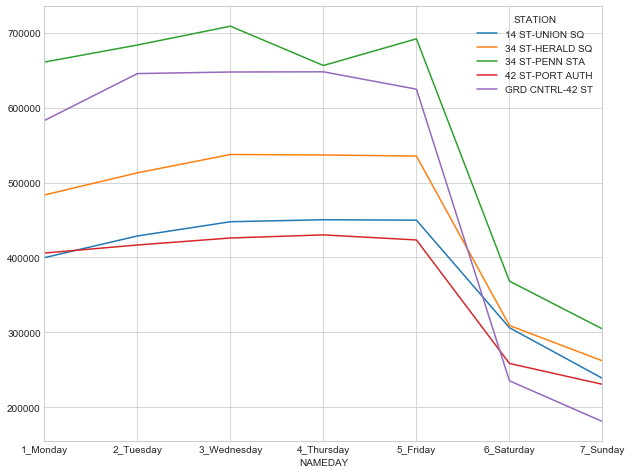

In [86]:
#pairDayGroup.plot(x='NAMEDAY', y='ENTRYCOUNT')
# ax = plt.subplot()
# sns.pointplot(x='DAY', y='ENTRYCOUNT', data=pairDayGroup,ax=ax, color='b')
# sns.pointplot(x='DAY', y='ENTRYCOUNT', data=pairDayGroup,ax=ax, color='r')
topNYCDayGroup.pivot('NAMEDAY','STATION','ENTRYCOUNT').plot(kind='line',figsize=customFig)

In [87]:
topNYCHour = topNYCDF[['STATION','HOUR','ENTRYCOUNT']].copy()
topNYCHour.sort_values('ENTRYCOUNT', ascending=False,inplace=True)

In [88]:
topNYCHour = (topNYCHour
 .sort_values(by=['STATION','ENTRYCOUNT'], ascending=[True,False])
 .groupby('STATION')
 .head(1))

In [89]:
topNYCHour

,STATION,HOUR,ENTRYCOUNT
4778,14 ST-UNION SQ,21,2796.0
3408,34 ST-HERALD SQ,20,2939.0
51961,34 ST-PENN STA,9,3994.0
49954,42 ST-PORT AUTH,12,2189.0
151834,GRD CNTRL-42 ST,20,4481.0


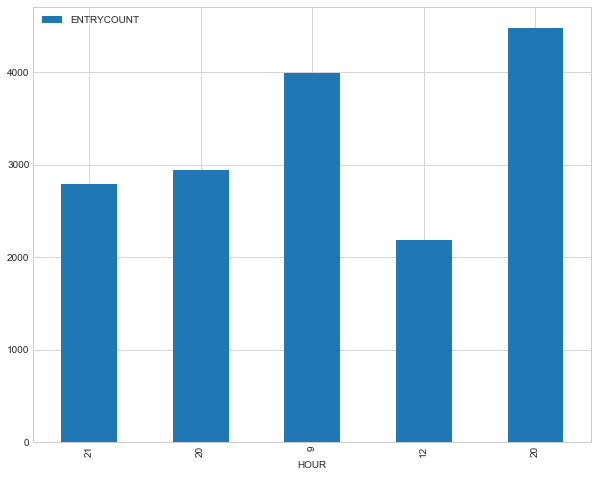

In [90]:
topNYCHour.plot(kind='bar', figsize=customFig,x='HOUR',y="ENTRYCOUNT")

In [91]:
topTechDF = df2.loc[(df2.STATIONLINE == '23 ST_FM') | (df2.STATIONLINE == '33 ST_6') | 
                (df2.STATIONLINE == '14 ST_123FLM') | (df2.STATIONLINE == '14 ST_ACEL') |
                 (df2.STATIONLINE == '23 ST_NRW')]


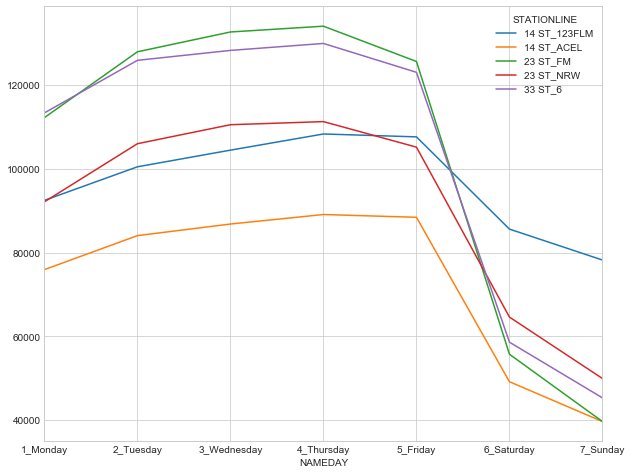

In [92]:
topTechDayGroup = topTechDF.groupby(['STATIONLINE','NAMEDAY']).ENTRYCOUNT.sum().reset_index()
topTechDayGroup.pivot('NAMEDAY','STATIONLINE','ENTRYCOUNT').plot(kind='line',figsize=customFig)

In [93]:
topTechDayGroupMax = topTechDF.groupby(['STATIONLINE','NAMEDAY']).ENTRYCOUNT.sum()
topTechDayGroupMax

STATIONLINE   NAMEDAY    
14 ST_123FLM  1_Monday        92483.0
              2_Tuesday      100495.0
              3_Wednesday    104472.0
              4_Thursday     108331.0
              5_Friday       107642.0
              6_Saturday      85612.0
              7_Sunday        78228.0
14 ST_ACEL    1_Monday        75938.0
              2_Tuesday       84059.0
              3_Wednesday     86825.0
              4_Thursday      89095.0
              5_Friday        88433.0
              6_Saturday      49164.0
              7_Sunday        39654.0
23 ST_FM      1_Monday       112246.0
              2_Tuesday      127962.0
              3_Wednesday    132693.0
              4_Thursday     134076.0
              5_Friday       125645.0
              6_Saturday      55727.0
              7_Sunday        39658.0
23 ST_NRW     1_Monday        92131.0
              2_Tuesday      106010.0
              3_Wednesday    110543.0
              4_Thursday     111287.0
              5_Friday  

In [94]:
topTechHour = topTechDF[['STATIONLINE','HOUR','ENTRYCOUNT']].copy()
topTechHour.sort_values('ENTRYCOUNT', ascending=False,inplace=True)

In [95]:
topTechHour = (topTechHour
 .sort_values(by=['STATIONLINE','ENTRYCOUNT'], ascending=[True,False])
 .groupby('STATIONLINE')
 .head(1))
#topTechHour.groupby(['STATIONLINE','HOUR']).ENTRYCOUNT.max().head(1)

In [96]:
topTechHour

,STATIONLINE,HOUR,ENTRYCOUNT
127943,14 ST_123FLM,20,1373.0
54004,14 ST_ACEL,21,2800.0
95348,23 ST_FM,20,2000.0
4194,23 ST_NRW,20,1934.0
149919,33 ST_6,21,1061.0


In [97]:
topTechDF.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES', 'KEY', 'STATIONLINE', 'DATETIME', 'ENTRYCOUNT', 'DAY',
       'NAMEDAY', 'HOUR'],
      dtype='object')

In [98]:
topTechHourDF = topTechDF.loc[(topTechDF.STATIONLINE == '23 ST_FM') & (topTechDF.DAY == 3)].copy()

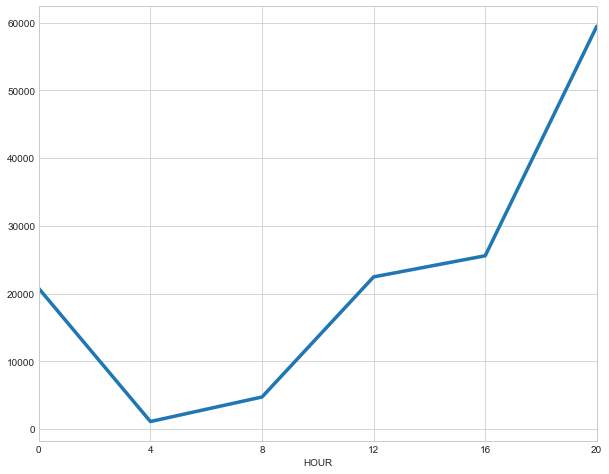

In [108]:
# unionSquareHourGroup = unionSquareDF.groupby('HOUR').ENTRYCOUNT.sum()
# unionSquareHourGroup.plot(kind='line', figsize=customFig, linewidth=3.5)
# 23 ST_FM Trains on Thursday
topTechHourGroup = topTechHourDF.groupby("HOUR").ENTRYCOUNT.sum()
topTechHourGroup.plot(kind='line',figsize=customFig,linewidth=3.5,xticks=[0,4,8,12,16,20])

In [107]:
topTechHourGroup

HOUR
0     20741.0
4      1101.0
8      4725.0
12    22458.0
16    25578.0
20    59473.0
Name: ENTRYCOUNT, dtype: float64

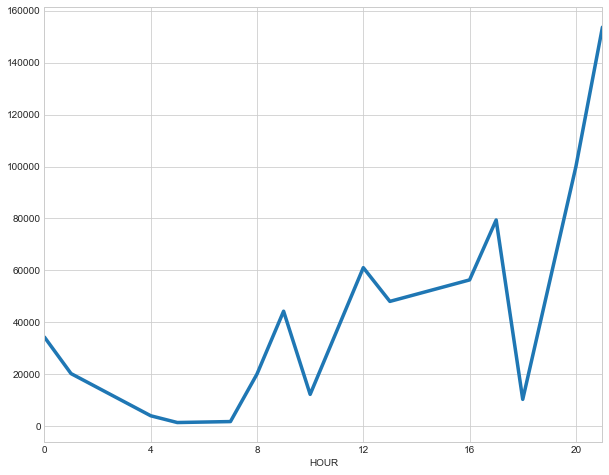

In [110]:
topNYCHourDF = topNYCDF.loc[(topNYCDF.STATION == 'GRD CNTRL-42 ST') & (topNYCDF.DAY == 3)].copy()
topNYCHourGroup = topNYCHourDF.groupby("HOUR").ENTRYCOUNT.sum()
topNYCHourGroup.plot(kind='line',figsize=customFig,linewidth=3.5,xticks=[0,4,8,12,16,20])

In [111]:
topNYCHourGroup

HOUR
0      34343.0
1      20305.0
4       4070.0
5       1467.0
7       1837.0
8      20143.0
9      44309.0
10     12308.0
12     61075.0
13     48087.0
16     56359.0
17     79421.0
18     10385.0
20     99916.0
21    153623.0
Name: ENTRYCOUNT, dtype: float64

In [112]:
topNYCDFCleanHours = topNYCDF.loc[(topNYCDF.HOUR == 0) | (topNYCDF.HOUR == 4) | 
                (topNYCDF.HOUR == 8) | (topNYCDF.HOUR == 12) |
                 (topNYCDF.HOUR == 16) | (topNYCDF.HOUR == 20)]

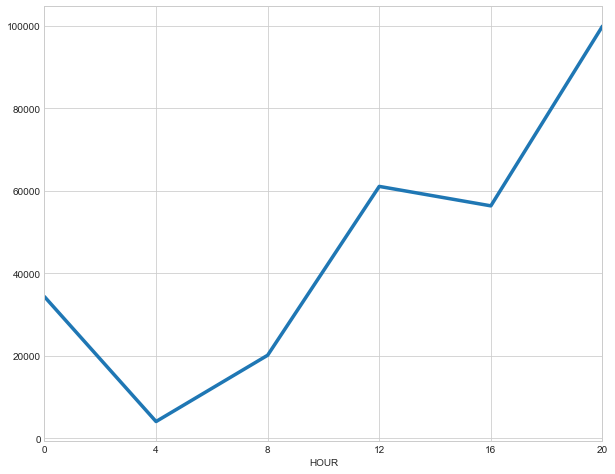

In [113]:
topNYCDFCleanHours1 = topNYCDFCleanHours.loc[(topNYCDFCleanHours.STATION == 'GRD CNTRL-42 ST') & (topNYCDFCleanHours.DAY == 3)].copy()
topNYCCleanHourGroup = topNYCDFCleanHours1.groupby("HOUR").ENTRYCOUNT.sum()
topNYCCleanHourGroup.plot(kind='line',figsize=customFig,linewidth=3.5,xticks=[0,4,8,12,16,20])

## Challenge 5

In [ ]:
turnstiles = df2.groupby(['C/A', 'UNIT', 'STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [ ]:
type(turnstiles)

In [ ]:
turnstiles.head()

## Challenge 6

In [ ]:
station = df.groupby(['STATION','DATE']).ENTRYCOUNT.sum().reset_index()


In [ ]:
station.head()

In [ ]:
station1 = station.loc[station.STATION == '1 AV']

In [ ]:
type(station1)

In [ ]:
# firstAveGroup = station.groupby('DATE')

In [ ]:
# firstAveGroup.plot(x=firstAveGroup.indices,y='ENTRYCOUNT')

## Challenge 7

In [ ]:
station1.plot(y='ENTRYCOUNT',x='DATE')

## Top 5 Stations based on Entries

In [ ]:
top5stations = df.groupby('STATION').ENTRYCOUNT.sum().reset_index()

In [ ]:
#top5stations = top5stations.sort_values('ENTRYCOUNT',ascending=False)

In [ ]:
top5stations.loc[top5stations.STATION == 'EASTCHSTER/DYRE']

In [ ]:
df.loc[df.STATION == 'EASTCHSTER/DYRE']

In [ ]:
df.ENTRYCOUNT.min()

In [ ]:
# Replace Days with Name Days
##titanic.sex=titanic.sex.replace({'female':0,'male':1})